In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import nltk
import re
import string
from nltk.stem.porter import PorterStemmer 
from nltk.corpus import stopwords
from wordcloud import WordCloud 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [51]:
import chardet

# Read a few bytes from the file to detect the encoding
with open('C:\\Users\\Dell\\OneDrive\\Desktop\\dataset\\spam.csv', 'rb') as f:
    result = chardet.detect(f.read(10000))  # Read the first 10,000 bytes
    encoding = result['encoding']

print(f"Detected encoding: {encoding}")



Detected encoding: Windows-1252


In [52]:
df = pd.read_csv('C:\\Users\\Dell\\OneDrive\\Desktop\\dataset\\spam.csv',encoding=encoding)

In [53]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [55]:
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


**Rnename the columns**

In [57]:
df.rename(columns = {'v1': 'target', 'v2':'Email'},inplace =True)

In [58]:
df.head()

,target,Email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [59]:
df.shape

(5572, 2)

## Preprocessing

**Missing Values**

In [60]:
missing_data = df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_data["% of Missing Values"] = round((missing_data["Total No. of Missing Values"]/len(df))*100,2)
missing_data

,Total No. of Missing Values,% of Missing Values
target,0,0.0
Email,0,0.0


**Checking Dublicates Values**

In [61]:
df.duplicated().sum()

403

**Drop Dublicates value**

In [62]:
df.drop_duplicates(keep='first')

,target,Email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


**Present shape of dataset**

In [63]:
df.shape

(5572, 2)

## EDA

In [64]:
df['target'].value_counts()

target
ham     4825
spam     747
Name: count, dtype: int64

C:\Users\Dell\AppData\Local\Temp\ipykernel_2000\1866326446.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='rainbow')


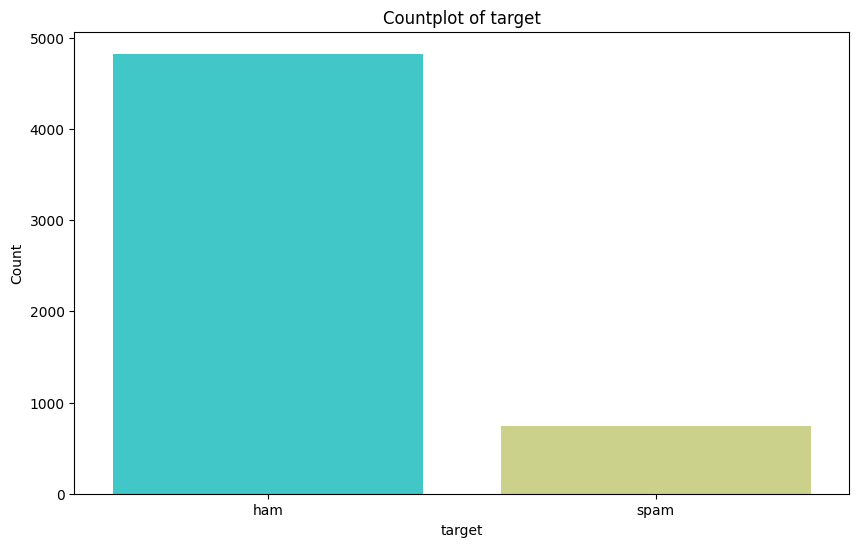

In [65]:
plt.figure(figsize=(10, 6))
sns.countplot(x='target', data=df, palette='rainbow')
plt.title('Countplot of target')
plt.xlabel('target')
plt.ylabel('Count')
plt.show()

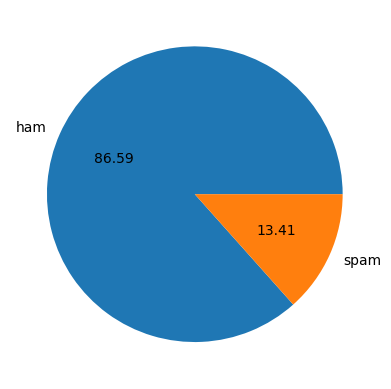

In [66]:
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

**Both plot shows 86.59% ham and 13.41 is spam. Basically it is imbalanced dataset**

**1. Count number of character for each email**

In [67]:
df['Number_of_char'] = df['Email'].apply(len)

In [68]:
df.head()

,target,Email,Number_of_char
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


**2. count number of words for each email**

In [69]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [70]:
df['number_of_words'] = df['Email'].apply(lambda x : len( nltk.word_tokenize(x)))

In [71]:
df.head()

,target,Email,Number_of_char,number_of_words
0,ham,"Go until jurong point, crazy.. Available only ...",111,24
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,ham,U dun say so early hor... U c already then say...,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15


**3. count number of sentence for each email**

In [72]:
df['number_of_sent'] = df['Email'].apply(lambda x : len( nltk.sent_tokenize(x)))

In [73]:
df.head()

,target,Email,Number_of_char,number_of_words,number_of_sent
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [74]:
df[['Number_of_char', 'number_of_words', 'number_of_sent']]

,Number_of_char,number_of_words,number_of_sent
0,111,24,2
1,29,8,2
2,155,37,2
3,49,13,1
4,61,15,1
...,...,...,...
5567,161,35,4
5568,37,9,1
5569,57,15,2
5570,125,27,1


In [75]:
# statistical summary of the data
df[['Number_of_char', 'number_of_words', 'number_of_sent']].describe()

,Number_of_char,number_of_words,number_of_sent
count,5572.000000,5572.000000,5572.000000
mean,80.118808,18.699390,1.996411
std,59.690841,13.741932,1.520159
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.500000
75%,121.000000,27.000000,2.000000
max,910.000000,220.000000,38.000000


**. Now, let's filter the data and look at the statistical summaries of individual ham and spam data
**

In [80]:
# Observation regarding ham mails
df[df['target'] == 0] [['Number_of_char', 'number_of_words', 'number_of_sent']].describe()

,Number_of_char,number_of_words,number_of_sent
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.276269,1.837720
std,58.016023,13.988585,1.454388
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [81]:
df[df['target'] == 1] [['Number_of_char', 'number_of_words', 'number_of_sent']].describe()

,Number_of_char,number_of_words,number_of_sent
count,747.000000,747.000000,747.000000
mean,138.866131,27.891566,3.021419
std,29.183082,6.867007,1.537580
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


**. Encoding text column which is categorical into numerical value using LabelEncoder**

In [82]:
le = LabelEncoder() # calling LabelEncoder
df['target'] = le.fit_transform(df['target']) # fitting the data into LabelEncoder
df.head()

,target,Email,Number_of_char,number_of_words,number_of_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


**. Draw a histogram that compares the number of charecters in ham and spam mails**

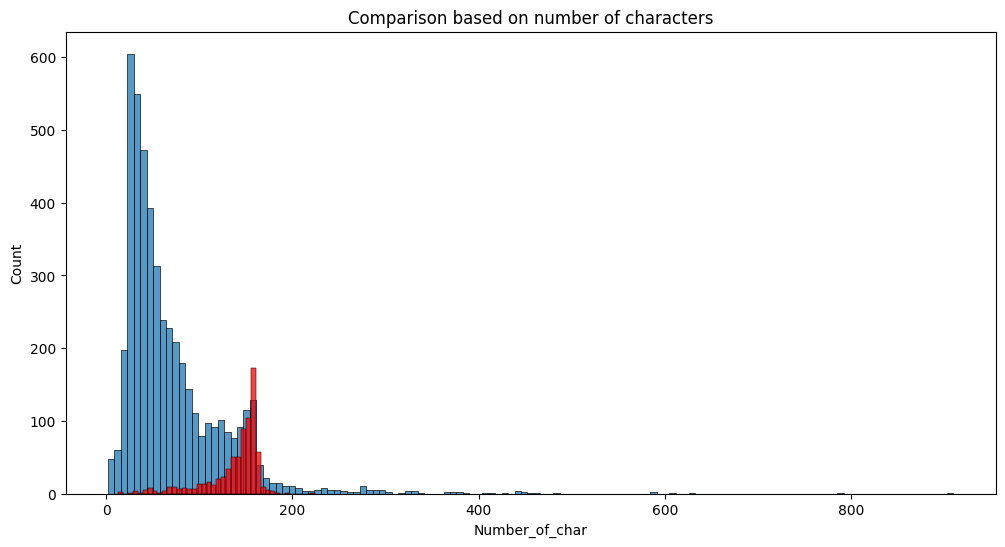

In [83]:
plt.figure(figsize = (12, 6))
sns.histplot(df[df['target'] == 0]['Number_of_char']) # for ham 
sns.histplot(df[df['target'] == 1]['Number_of_char'], color = 'red') # for spam
plt.title('Comparison based on number of characters')
plt.show()

**. Here, we can see that the number of characters in the ham email greater than the spam email.**

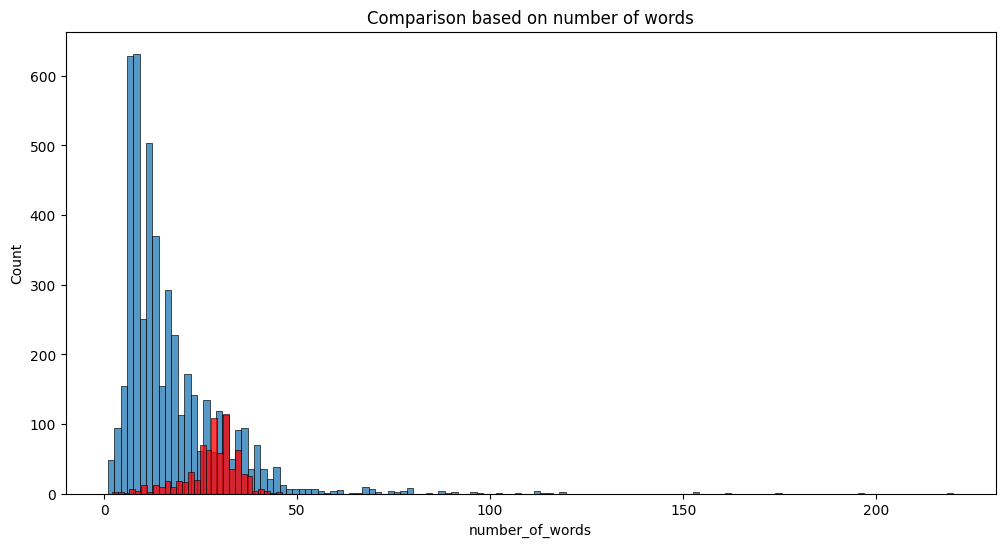

In [84]:
plt.figure(figsize = (12, 6))
sns.histplot(df[df['target'] == 0]['number_of_words']) # for ham 
sns.histplot(df[df['target'] == 1]['number_of_words'], color = 'red') # for spam
plt.title('Comparison based on number of words')
plt.show()

**. Here, we can see that the number of words in the ham email greater than the spam email.**

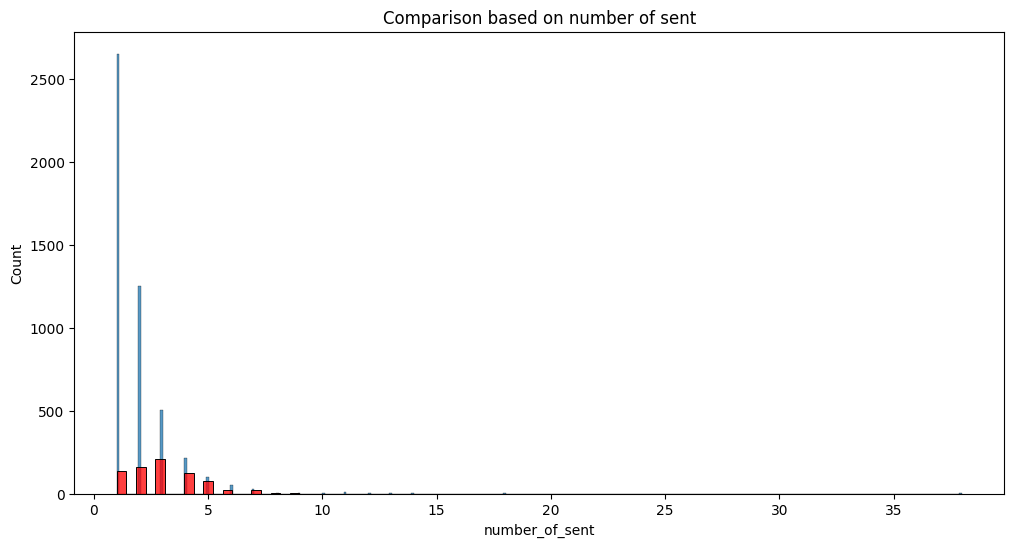

In [85]:
plt.figure(figsize = (12, 6))
sns.histplot(df[df['target'] == 0]['number_of_sent']) # for ham 
sns.histplot(df[df['target'] == 1]['number_of_sent'], color = 'red') # for spam
plt.title('Comparison based on number of sent')
plt.show()

**. Here, we can see that the number of sentence in the ham email greater than the spam email.**

## Text Preprocessing 
1. Convert the uppercase letters into lowercase
2. Tokenize the text
3. Romove the special characteristics
4. Remove stopwords and punctuation
5. Stemming

In [86]:
# calling the PorterStemmer
ps = PorterStemmer()

# Lowercase transformation and text preprocessing function
def transform_text(text):
    # Transform the text to lowercase
    text = text.lower()
    
    # Tokenization using NLTK
    text = nltk.word_tokenize(text)
    
    # Removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    # Removing stop words and punctuation
    text = y[:]
    y.clear()
    
    # Loop through the tokens and remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
        
    # Stemming using Porter Stemmer
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    # Join the processed tokens back into a single string
    return " ".join(y)

In [87]:
# applying function on the text column
df['new_text'] = df['Email'].apply(transform_text)
df.head()

,target,Email,Number_of_char,number_of_words,number_of_sent,new_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [36]:
df.columns

Index(['target', 'Email', 'Number_of_char', 'number_of_words',
       'number_of_sent', 'new_text'],
      dtype='object')

**Now let's visualize the text using WordCloud**

Ham text: 'go jurong point crazi avail bugi n great world la e buffet cine got amor wat ok lar joke wif u oni u dun say earli hor u c alreadi say nah think goe usf live around though even brother like speak treat like aid patent per request mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun gon na home soon want talk stuff anymor tonight k cri enough today search right word thank breather promis wont take help grant fulfil promis wonder bless time date sunday oh k watch eh u rememb 2 spell name ye v naughti make v wet fine thatåõ way u feel thatåõ way gota b serious spell name go tri 2 month ha ha joke pay first lar da stock comin aft finish lunch go str lor ard 3 smth lor u finish ur lunch alreadi ffffffffff alright way meet sooner forc eat slice realli hungri tho suck mark get worri know sick turn pizza lol lol alway convinc catch bu fri egg make tea eat mom left dinner feel love back amp pack car let know room ahhh work vagu rememb feel like lo

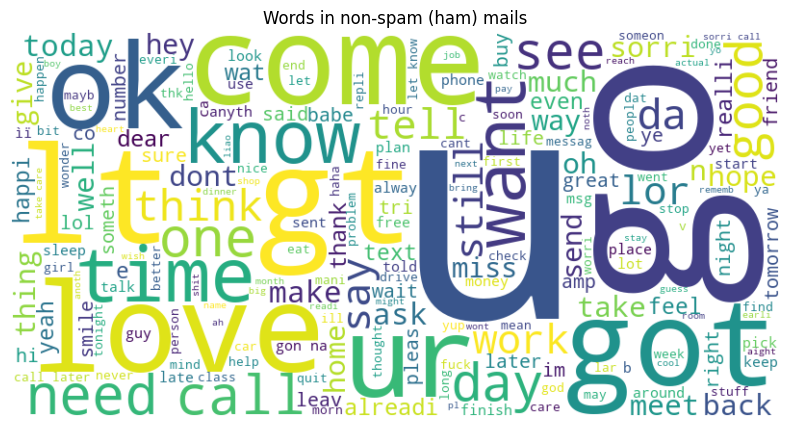

In [88]:
# Generate word cloud for ham (target == 0)
ham_text = df[df['target'] == 0]['new_text'].str.cat(sep=" ")
print(f"Ham text: '{ham_text}'")

# Generate word cloud for ham if ham_text is not empty
if ham_text.strip():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Words in non-spam (ham) mails')
    plt.show()
else:
    print("No words to generate word cloud for ham.")

Ham text: 'free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18 freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030 six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18 xxxmobilemovieclub use credit click wap link next txt messag click http england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq thank subscript rington uk mobil charg pleas confirm repli ye repli charg 07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow sm ac sptv new jersey devil det

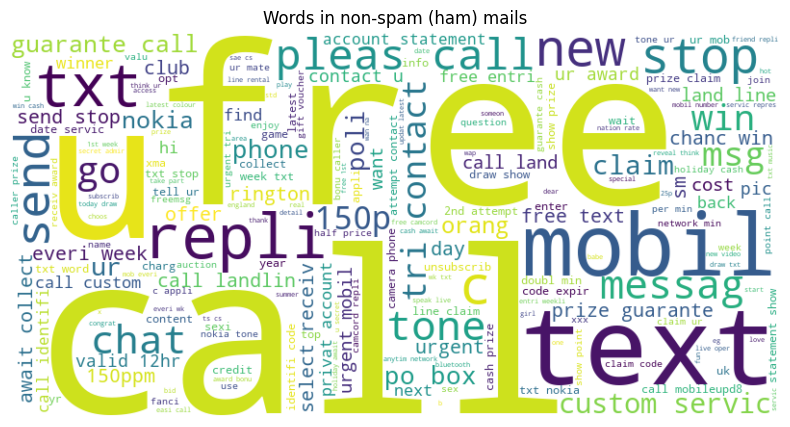

In [89]:
# Generate word cloud for ham (target == 1)
ham_text = df[df['target'] == 1]['new_text'].str.cat(sep=" ")
print(f"Ham text: '{ham_text}'")

# Generate word cloud for ham if ham_text is not empty
if ham_text.strip():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Words in non-spam (ham) mails')
    plt.show()
else:
    print("No words to generate word cloud for ham.")

## Model Building

**. Spliting the features into X and y**

In [100]:
tfidf = TfidfVectorizer()

# Transform the messages into a bag-of-words representation
X = tfidf.fit_transform(df['new_text']).toarray()
# Get the labels
y = df['target'].values  # Ensure y is a 1D array

In [92]:
X.shape

(5572, 6708)

In [101]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Naive_bsyes Model

In [41]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB 

In [42]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [102]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8600896860986547
[[826 139]
 [ 17 133]]
0.4889705882352941


In [103]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9632286995515695
[[965   0]
 [ 41 109]]
1.0


In [104]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.967713004484305
[[961   4]
 [ 32 118]]
0.9672131147540983


In [46]:
# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear')

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)


SVC(kernel='linear')

In [106]:
# Make predictions on the test set with SVM
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the SVM classifier
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

print("SVM Classifier:")
print(f"Accuracy: {accuracy_svm}")
print("Classification Report:\n", classification_rep_svm)

SVM Classifier:
Accuracy: 0.8654708520179372
Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       965
           1       0.00      0.00      0.00       150

    accuracy                           0.87      1115
   macro avg       0.43      0.50      0.46      1115
weighted avg       0.75      0.87      0.80      1115



c:\Users\Dell\.conda\envs\python_eda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dell\.conda\envs\python_eda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dell\.conda\envs\python_eda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


----
**Introduction:**

This report analyzes the performance of four classification models: Bernoulli Naive Bayes (BNB), Multinomial Naive Bayes (MNB), Gaussian Naive Bayes (GNB), and Support Vector Machine (SVM). The analysis focuses on the task of classifying text documents into different categories, and the models are evaluated based on their precision score.

**Methodology:**

A dataset of text documents was divided into training and testing sets.
The four classification models were trained on the training set.
The models were evaluated on the testing set using the precision score metric.
The results were compared to identify the model with the highest precision score.
Results:

* The following table summarizes the precision scores of the four models:

Model	Precision Score
1. BNB	96%
2. MNB	100%
3. GNB	48%
4. SVM	87%
-----

In [108]:
import pickle
pickle.dump(tfidf, open('vectorizer', 'wb'))
pickle.dump(tfidf, open('model.pkl', 'wb'))